# Factorial experiments

## 1. Introduction

In most experiments several factors affect the results. When designing an experiment one could could test the effect of individual factors in separate experiments, but this is time consuming and expensive. Also, this gives no indication on the possible interaction between factors, and gives a poor estimate of standard error.

In factorial experiments the treatments are combinations of two or more levels of two or more factors. A factor is a categorical variable which can take one or more values called levels.

## 2. Advantages of factorial experiments

Suppose we wish to compare the response of three varieties of rice to five rates of nitrogen fertiliser using either a factorial or separate experiments for nitrogen and variety. For the nitrogen experiment, we could use a randomised block design with four blocks and one variety. For the variety experiment, we could use a randomised block design with seven blocks each containing the same fertiliser level. The skeleton ANOVA tables are shown below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from itertools import repeat
from scipy.stats import f
from scipy.stats import t

In [2]:
anova_fertiliser = {'Source':['blocks','fertiliser', 'residual', 'total'],
                   'df':[3, 4, 12, 19]}
anova_variety = {'Source':['blocks', 'variety', 'residual', 'total'],
                'df':[6, 2, 12, 20]}
df1 = pd.DataFrame(anova_fertiliser).set_index('Source')
df2 = pd.DataFrame(anova_variety).set_index('Source')
print('Skeleton ANOVA tables\n')
print(df1, '\n')
print(df2)

Skeleton ANOVA tables

            df
Source        
blocks       3
fertiliser   4
residual    12
total       19 

          df
Source      
blocks     6
variety    2
residual  12
total     20


For these experiments the number of blocks would be chosen to ensure at least 12 residual degrees of freedom for estimating the error variance. These two experiments would require 41 plots altogether. With separate experiments we cannot test if there is an interaction between variety and fertiliser. There would be an interaction if the response to fertiliser is not the same for the different varieties, as shown on the figures below.

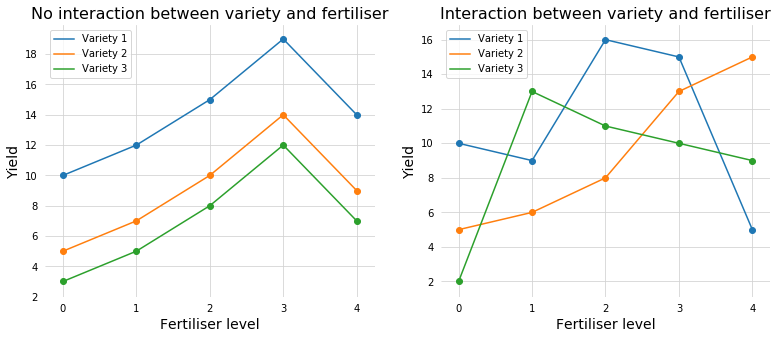

In [3]:
#value for x-axis
x = list(range(5))

#yields for each variety in the case of no interaction
#between variety and fertiliser
var1 = np.array([10, 12, 15, 19, 14])
var2 = var1 - 5
var3 = var1 - 7

#yields for each variety in the case of an interaction
var1_int = np.array([10, 9, 16, 15, 5])
var2_int = np.array([5, 6, 8, 13, 15])
var3_int = np.array([2, 13, 11, 10, 9])

#plot data on left panel
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(13, 5))
ax.plot(x, var1, color='C0', label='Variety 1')
ax.scatter(x, var1, color='C0', zorder=4)
ax.plot(x, var2, color='C1', label='Variety 2')
ax.scatter(x, var2, color='C1', zorder=4)
ax.plot(x, var3, color='C2', label='Variety 3')
ax.scatter(x, var3, color='C2', zorder=4)

#adjust figure display
ax.set_xticks(x)
ax.tick_params(axis='both', color='white')
ax.grid(color='lightgrey', zorder=1)
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)
    
#add labels
ax.set_xlabel('Fertiliser level', fontsize=14)
ax.set_ylabel('Yield', fontsize=14)
ax.set_title('No interaction between variety and fertiliser', fontsize=16)
ax.legend()

#plot data on right panel
ax1.plot(x, var1_int, color='C0', label='Variety 1')
ax1.scatter(x, var1_int, color='C0', zorder=4)
ax1.plot(x, var2_int, color='C1', label='Variety 2')
ax1.scatter(x, var2_int, color='C1', zorder=4)
ax1.plot(x, var3_int, color='C2', label='Variety 3')
ax1.scatter(x, var3_int, color='C2', zorder=4)

#adjust figure display
ax1.set_xticks(x)
ax1.tick_params(axis='both', color='white')
ax1.grid(color='lightgrey')
for spine in ['top', 'bottom', 'left', 'right']:
    ax1.spines[spine].set_visible(False)
    
#add labels
ax1.set_xlabel('Fertiliser level', fontsize=14)
ax1.set_ylabel('Yield', fontsize=14)
ax1.set_title('Interaction between variety and fertiliser', fontsize=16)
ax1.legend()
plt.show()

Now suppose we design a factorial experiment where factor A is fertiliser at five levels and factor B is variety at three levels. There are 15 treatments (giving 14 residual degrees of freedom), giving all possible combinations of factor levels. We implement a randomised block design with two blocks. The skeleton ANOVA table is shown below.

In [4]:
anova_fact = {'Source':['blocks', 'fertiliser', 'variety', 'F x V', 'residual', 'total'],
             'df':[1, 4, 2, 8, 14, 29]}
df = pd.DataFrame(anova_fact).set_index('Source')
print('Skeleton ANOVA table\n')
print(df)

Skeleton ANOVA table

            df
Source        
blocks       1
fertiliser   4
variety      2
F x V        8
residual    14
total       29


The factorial design is advantageous because in the two separate experiments a total of 41 plots are required and the residual degrees of freedom are only 12. There is no test for interaction. The factorial design with two blocks requires 30 plots to provide 14 residual degrees of freedom. It means we fewer plots we achieve a greater precision and can also test for interaction between factors.

## 3. Main effects and interactions

Consider a factorial design with two factors each at two levels, a 2 x 2 factorial experiment. We investigate the effect of phosphorus and potassium fertilisers on crop yield. The four treatments are:
* treatment 1 : $P_0$, $K_0$ no fertiliser (control)
* treatment 2 : $P_0$, $K_1$ 15 kg/ha of potassium
* treatment 2 : $P_1$, $K_0$ 20 kg/ha of phosphorus
* treatment 2 : $P_1$, $K_1$ 20 kg/ha of phosphorus and 15 kg/ha of potassium

Three possible results for this experiment are plotted below, showing positive, negative and no interaction. Each point on the graph is the mean of r yields.

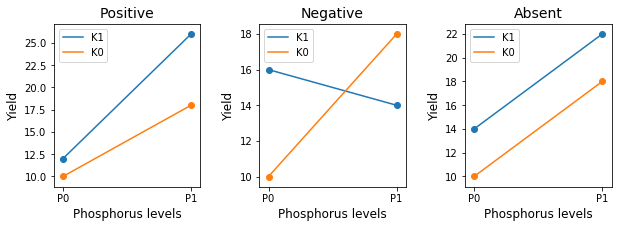

In [5]:
#yields for each possible outcome (positive, negative or no interaction)
y1_pos = [12, 26]
y2_pos = [10, 18]
y1_neg = [16, 14]
y2_neg = [10, 18]
y1_no = [14, 22]
y2_no = [10, 18]
yy = [[y1_pos, y2_pos], [y1_neg, y2_neg], [y1_no, y2_no]]
x = list(range(2))

titles = ['Positive', 'Negative', 'Absent']
fig, axes = plt.subplots(ncols=3, figsize=(10, 3))
for i, y in enumerate(yy):
    axes[i % 3].plot(x, y[0], color='C0', label='K1')
    axes[i % 3].plot(x, y[1], color='C1', label='K0')
    axes[i % 3].scatter(x, y[0], color='C0')
    axes[i % 3].scatter(x, y[1], color='C1')
    axes[i % 3].set_xticks(x)
    axes[i % 3].set_xticklabels(['P0', 'P1'])
    axes[i % 3].set_xlabel('Phosphorus levels', fontsize=12)
    axes[i % 3].set_ylabel('Yield', fontsize='12')
    axes[i % 3].legend()
    axes[i % 3].set_title(titles[i % 3], fontsize=14)
plt.subplots_adjust(wspace = 0.4)

**Positive interaction**
* Effect of P in absence of K : 18 - 10 = 8
* Effect of P in presence of K : 26 - 12 = 14
* Effect of K in absence of P : 12 - 10 = 2
* Effect of K in presence of P : 26 - 18 = 8
Thus, the response to P depends on whether K is present, and the response to K depends on P. The yield increase due to adding P alone i 8. The yield increase due to K alone is 2. If P and K were acting independently, you would expect a yield increase of 8 + 2 = 10 when both are applied. In fact, the increase is 16, so the interaction is positive and the **interaction effect** is +6. The main effect of K is 
$\frac{12+26}{2}-\frac{10+18}{2}=5$ and the main effect of P is $\frac{18+26}{2}-\frac{10+12}{2}=11$. However, it would be misleading to quote this because of the interaction.

**Negative interaction**
* Effect of P in absence of K : 18 - 10 = 8
* Effect of P in presence of K : 14 - 16 = -2
* Effect of K in absence of P : 16 - 10 = 6
* Effect of K in presence of P : 14 - 18 = -4
It would be very misleading to say that the main effect of K is $\frac{16+14}{2}-\frac{10+18}{2}=1$. The **interaction effect** is (*effect of P in presence of K*) - (*effect of P in absence of K*) = -10.

**Absence of interaction**
* Effect of P in absence of K : 18 - 10 = 8
* Effect of P in presence of K : 22 - 14 = 8
* Effect of K in absence of P : 14 - 10 = 6
* Effect of K in presence of P : 2 - 18 = 6
The two responses are independent and the **interaction effect** is null.

## 4. Analysis of a randomised blocks factorial experiment with two factors

### 4.1 The experiment

A factorial experiment was carried out in order to determine the yield response of one rice variety to three species of mycorrhizal fungus, denoted S1, S2 and S3, and five levels of a nitrogen fertilizer (N1, N2, N3, N4, N5). This is a 3 x 5 factorial experiment. A randomised block design was adopted and the 15 treatments were randomly assigned to plots within each block. This experiment can be used to explore the following objectives:
* main effect of nitrogen fertiliser on rice yield when averaged over the fungal species
* the main effect of fungal species on rice yield when aeraged over levels of nitrogen
* interaction : if differences between fungal species yields are not the same at each nitrogen level

In [6]:
#experimental values stored as a "tidy" dataframe
#each row is an observation, each column a factor
S = list(chain(repeat(1, 15), repeat(2, 15), repeat(3, 15)))
Ni = list(chain(*map(lambda i: repeat(i, 3), range(1, 6)))) * 3
B = [1, 2, 3] * 15
Y = [0.9, 0.9, 1.0, 
     1.2, 1.3, 1.2, 
     1.3, 1.5, 1.4, 
     1.8, 1.9, 2.1, 
     1.1, 1.4, 1.2, 
     0.9, 0.8, 0.8, 
     1.1, 0.9, 0.9, 
     1.3, 1.5, 1.1, 
     1.6, 1.3, 1.1, 
     1.9, 1.6, 1.5,
     0.9, 1.0, 0.7, 
     1.4, 1.2, 1.0,
     1.3, 1.4, 1.4,
     1.4, 1.5, 1.4,
     1.2, 1.1, 1.3]

#dataframe storing the experiment
data = pd.DataFrame({'fungus':S, 'nitrogen':Ni, 'block':B, 'yield':Y})

### 4.2 The model

Yield = overall mean + block effect + treatment effect + residual
Yield = fitted value + residual
Fitted value = overall mean + block effect + treatment effect
Residual = yield - fitted value

* the overall mean is estimated by the grand mean (GM)
* the block effect is estimated by BE = block mean - grand mean = BM - GM
* the treatment effect is estimated by TE = treatment mean - grand mean = TM - GM
* the fitted yield predicted by the model is estimated as F = GM + (BM - GM) + (TM - GM) = BM + TM - GM
* the residual is the difference between the observed yield and the fitted value, it is estimated as R = Y - F = Y - BM - TM + GM

* the fungal species effect is estimated as SE = species mean - grand mean = SM - GM
* the nitrogen effect is estimated as NE = nitrogen mean - grand mean = NM - GM
* the interaction effect is estimated as IE = treatment effect - species effect - nitrogen effect = (TM - GM) - (PM - GM) - (NM - GM) = TM - PM - NM + GM

Let's calculate all these values.

In [7]:
#===========================#
#=== sample sizes and df ===#
#===========================#

#total number of observations
N = len(data)

#number of blocks
n_block = len(set(data['block']))

#number of fungal species levels
n_species = len(set(data['fungus']))

#number of nitrogen levels
n_nitro = len(set(data['nitrogen']))

#number of treatments
n_treat = n_species * n_nitro

#interaction degrees of freedom
inter_df = (n_species - 1) * (n_nitro - 1)

#residual degrees of freedom
resid_df = N - n_block - n_species - n_nitro - ((n_species - 1) * (n_nitro - 1)) + 2 

#=======================================#
#=== sum of squares and mean squares ===#
#=======================================#

#total sum of  and mean squares
total_ss = data['yield'].var(ddof=1) * (N - 1)

#block sum of and mean squares
block_ss = data.groupby('block').sum()['yield'].var() * (n_block - 1) / (N / n_block)
block_ms = block_ss / (n_block - 1)

#fungus sum of and mean squares
species_ss = data.groupby('fungus').sum()['yield'].var() * (n_species - 1) / (N / n_species)
species_ms = species_ss / (n_species - 1)

#nitrogen sum of and mean squares
nitro_ss = data.groupby('nitrogen').sum()['yield'].var() * (n_nitro - 1) / (N / n_nitro)
nitro_ms = nitro_ss / (n_nitro - 1)

#treatment sum of and mean squares
treat_ss = data.groupby(['fungus', 'nitrogen']).sum()['yield'].var() * (n_treat - 1) / (N / n_treat)
treat_ms = treat_ss / (n_treat - 1)

#interaction sum of an mean squares
inter_ss = treat_ss - species_ss - nitro_ss
inter_ms = inter_ss / inter_df

#residual sum of squares
resid_ss = total_ss - block_ss -  treat_ss
resid_ms = resid_ss / resid_df

#====================================#
#=== variance ratios and p-values ===#
#====================================#
vr_species = species_ms / resid_ms
p_species = 1 - f.cdf(vr_species, n_species - 1, resid_df)

vr_nitro = nitro_ms / resid_ms
p_nitro = 1 - f.cdf(vr_nitro, n_nitro - 1, resid_df)

vr_inter = inter_ms / resid_ms
p_inter = 1 - f.cdf(vr_inter, inter_df, resid_df)

In [8]:
#================================================================================#
#=== standard error of difference (SED) and leas significant difference (LSD) ===#
#================================================================================#

#SED and LSD between two overall species means
sed_species = np.sqrt(2 * resid_ms / n_block / n_nitro)
lsd_species = sed_species * t.ppf(0.975, resid_df)

#SED between two overall nitrogen means
sed_nitro = np.sqrt(2 * resid_ms / n_block / n_species)
lsd_nitro = sed_nitro * t.ppf(0.975, resid_df)

#SED between two overall species x nitrogen combination means
sed_comb = np.sqrt(2 * resid_ms / n_block)
lsd_comb = sed_comb * t.ppf(0.975, resid_df)

In [9]:
#=================================#
#=== coefficients of variation ===#
#=================================#

#residual coefficient of variation
resid_cv = np.sqrt(resid_ms) / data['yield'].mean()

#block coefficient of variation
block_cv = np.sqrt(block_ms / n_species / n_nitro) / data['yield'].mean()

In [10]:
#putting it all together

def factorial_anova(data=None, variate=None, block=None, factors=None):
    """Perform an ANOVA on an experiment with a factorial design.
    
    data : CSV file containing a tidy dataframe (each row is an observation, each column is a variable)
    
    variate : name of the column of the dataframe containing the response variable
    
    block : name of the column of the dataframe containing block numbers
    
    factors : list of factor names
    """
    
    data = pd.read_csv(data)
    
    #===========================================#
    #=== sample sizes and degrees of freedom ===#
    #===========================================#

    #total number of observations
    N = len(data)

    #number of blocks
    n_block = len(set(data[block]))

    #number of factors levels
    n_fact = []
    for i in range(len(factors)):
        n_fact.append(len(set(data[factors[i]])))

    #number of treatments
    n_treat = 1
    for i in n_fact:
        n_treat *= i

    #interaction degrees of freedom
    inter_df = 1
    for i in n_fact:
        inter_df *= i - 1

    #residual degrees of freedom
    resid_df = N - n_block - sum(n_fact) - inter_df + len(factors) 

    #=======================================#
    #=== sum of squares and mean squares ===#
    #=======================================#

    #total sum of  and mean squares
    total_ss = data[variate].var(ddof=1) * (N - 1)

    #block sum of and mean squares
    block_ss = data.groupby(block).sum()[variate].var() * (n_block - 1) / (N / n_block)
    block_ms = block_ss / (n_block - 1)
    
    #list of factors sum of squares and mean squares
    fact_ss = []
    for idx, fac in enumerate(factors):
        fact_ss.append(data.groupby(fac).sum()[variate].var() * (n_fact[idx] - 1) / (N / n_fact[idx]))
    fact_ms = []
    for idx, ss in enumerate(fact_ss):
        fact_ms.append(ss / (n_fact[idx] - 1))

    #treatment sum of and mean squares
    treat_ss = data.groupby(factors).sum()[variate].var() * (n_treat - 1) / (N / n_treat)
    treat_ms = treat_ss / (n_treat - 1)

    #interaction sum of an mean squares
    inter_ss = treat_ss - sum(fact_ss)
    inter_ms = inter_ss / inter_df

    #residual sum of squares
    resid_ss = total_ss - block_ss -  treat_ss
    resid_ms = resid_ss / resid_df

    #====================================#
    #=== variance ratios and p-values ===#
    #====================================#
    vr_block = block_ms / resid_ms
    p_block = 1 - f.cdf(vr_block, n_block - 1, resid_df)
    
    #list of variance ratios for factors
    vr_fact = []
    for idx, ms in enumerate(fact_ms):
        vr_fact.append(ms / resid_ms)
    
    #list of p-values for factors
    p_fact = []
    for idx, vr in enumerate(vr_fact):
        p_fact.append(1 - f.cdf(vr, n_fact[idx] - 1, resid_df))

    vr_inter = inter_ms / resid_ms
    p_inter = 1 - f.cdf(vr_inter, inter_df, resid_df)
    
    #=============#
    #=== means ===#
    #=============#
    #calculate means for each factor grouping
    #make a dictionary containing means
    dic_means = {}
    for fac in factors:
        dic_means[fac] = [mean for mean in data.groupby(fac)[variate].mean()]
    #means = pd.DataFrame(dic_means)

    #================================================================================#
    #=== standard error of difference (SED) and leas significant difference (LSD) ===#
    #================================================================================#

    #list of SED between two overall means for a given factor
    sed_fact = []
    for n in n_fact:
        sed_fact.append(np.sqrt(2 * resid_ms / n_block / (sum(n_fact) - n)))
        
    #list of LSD between two overall means for a given factor
    lsd_fact = []
    for s in sed_fact:
        lsd_fact.append(s * t.ppf(0.975, resid_df))

    #SED between two overall species x nitrogen combination means
    sed_comb = np.sqrt(2 * resid_ms / n_block)
    lsd_comb = sed_comb * t.ppf(0.975, resid_df)
    
    #=================================#
    #=== coefficients of variation ===#
    #=================================#

    #residual coefficient of variation
    resid_cv = np.sqrt(resid_ms) / data[variate].mean()

    #block coefficient of variation
    block_cv = np.sqrt(block_ms / n_fact[0] / n_fact[1]) / data[variate].mean()
    
    #=================#
    #=== plot data ===#
    #=================#
    
    fig, ax = plt.subplots()
    for level in set(data[factors[0]]):
        plt.plot(list(set(data[factors[1]])), 
                 data[data[factors[0]] == level].groupby(factors).median()[variate].values, 
                 label='{0} {1}'.format(factors[0], level))
        plt.scatter(list(set(data[factors[1]])), 
                    data[data[factors[0]] == level].groupby(factors).median()[variate].values,
                    zorder=4)  
    ax.legend()
    
    #adjust display parameters
    ax.set_xlabel(factors[1], fontsize=14)
    ax.set_ylabel(variate, fontsize=14)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)
    ax.set_xticks(list(set(data[factors[1]])))
    ax.tick_params(axis='both', color='white')
    ax.grid(color='lightgrey')
    
    
    #=====================#
    #=== print results ===#
    #=====================#
    
    #print ANOVA
    print('=== Analysis of variance ===\n')
    print('Response variable: ', variate, '\n')
    print('{0:<12}{1:>10}{2:>10}{3:>10}{4:>10}{5:>10}'.format('Source', 'df', 'Sum sq', 'Mean sq', 'VR', 'p'))
    print('-' * 62)
    if block != None:
        print('\n{0:<12}{1:>10}{2:>10.3f}{3:10.3f}{4:>10.3f}{5:>10.5f}\n'.format('block', n_block - 1, block_ss,
                                                                            block_ms, vr_block, p_block))
    for idx, fac in enumerate(factors):
        print('{0:<12}{1:>10}{2:>10.3f}{3:>10.3f}{4:>10.3f}{5:>10.5f}'.format(fac, n_fact[idx] - 1, fact_ss[idx], 
                                                                              fact_ms[idx], vr_fact[idx], 
                                                                              p_fact[idx]))
    print('{0:<12}{1:>10}{2:>10.3f}{3:>10.3f}{4:>10.3f}{5:>10.5f}'.format('interaction', inter_df, inter_ss,
                                                                         inter_ms, vr_inter, p_inter))
    print('{0:<12}{1:>10}{2:>10.3f}{3:>10.3f}'.format('residual', resid_df, resid_ss, resid_ms))
    print('\n{0:<12}{1:>10}{2:>10.3f}\n\n'.format('total', N - 1, total_ss))
    
    #print tables of means
    print('=== Tables of means ===\n')
    print('Grand mean: {}\n'.format(data[variate].mean()))
    
    #print means for individual factors
    for fac in factors:
        print(pd.DataFrame(data.groupby(fac)[variate].mean()).T, '\n')
    
    #print means of factors combinations
    print(pd.DataFrame(data.groupby(factors)[variate].mean().reset_index()).pivot(index='fungus', 
                                                                                  columns='nitrogen', 
                                                                                  values='yield'), '\n\n')
    #print SEDs
    print('=== Standard errors of differences of means ===\n')
    print('{0:<10}{1:>10}{2:>10}{3:>10}'.format('', factors[0], factors[1], 'Inter'))
    print('{0:<10}{1:>10}{2:>10}{3:>10}'.format('rep', n_fact[0], n_fact[1], int(N / n_fact[0] / n_fact[1])))
    print('{0:<10}{1:>10}{2:>10}{3:>10}'.format('df', resid_df, resid_df, resid_df))
    print('{0:<10}{1:>10.3f}{2:>10.3f}{3:>10.3f}\n\n'.format('sed', sed_fact[0], sed_fact[1], sed_comb))
    
    #print LSDs
    print('=== Least significant difference of means (5% level) ===\n')
    print('{0:<10}{1:>10}{2:>10}{3:>10}'.format('', factors[0], factors[1], 'Inter'))
    print('{0:<10}{1:>10}{2:>10}{3:>10}'.format('rep', n_fact[0], n_fact[1], int(N / n_fact[0] / n_fact[1])))
    print('{0:<10}{1:>10}{2:>10}{3:>10}'.format('df', resid_df, resid_df, resid_df))
    print('{0:<10}{1:>10.3f}{2:>10.3f}{3:>10.3f}\n\n'.format('lsd', lsd_fact[0], lsd_fact[1], lsd_comb))
    
    #print coefficients of variation
    print('=== Coefficients of variation ===\n')
    if block != None:
        print('Block cv: {:.2f}%'.format(block_cv * 100))
    print('Residual cv: {:.2f}%'.format(resid_cv * 100))

=== Analysis of variance ===

Response variable:  yield 

Source              df    Sum sq   Mean sq        VR         p
--------------------------------------------------------------

block                2     0.064     0.032     1.631   0.21377

fungus               2     0.169     0.085     4.316   0.02324
nitrogen             4     2.490     0.623    31.732   0.00000
interaction          8     1.015     0.127     6.468   0.00009
residual            28     0.549     0.020

total               44     4.288


=== Tables of means ===

Grand mean: 1.26

fungus         1     2         3
yield   1.346667  1.22  1.213333 

nitrogen         1         2         3         4         5
yield     0.877778  1.133333  1.355556  1.566667  1.366667 

nitrogen         1         2         3         4         5
fungus                                                    
1         0.933333  1.233333  1.400000  1.933333  1.233333
2         0.833333  0.966667  1.300000  1.333333  1.666667
3         0.8666

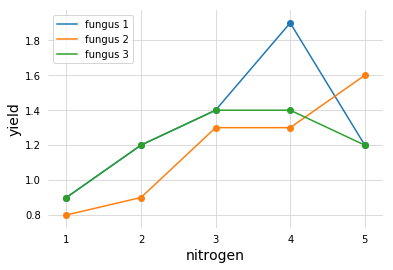

In [11]:
factorial_anova('data_factorial.csv', variate='yield', block='block', 
                                              factors=['fungus', 'nitrogen'])